# Prisoners Data Visualization

### Step 1: Import the necessary libraries

In [1]:
import pandas as pd

### Step 2: Load the data and display first 5 and last 5 records

In [2]:
data=pd.read_csv('Prisoners-Dataset.csv')

### Step 3: Describe the data

In [3]:
data.describe()

,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
count,35.0,35.000000,35.000000,35.000000,35.000000
mean,2013.0,1057.914286,1534.857143,237.457143,210.171429
std,0.0,2078.196777,3022.110503,375.614191,359.117340
min,2013.0,0.000000,0.000000,0.000000,0.000000
25%,2013.0,0.000000,6.500000,2.000000,0.000000
50%,2013.0,167.000000,237.000000,33.000000,38.000000
75%,2013.0,1294.500000,1733.500000,234.500000,227.500000
max,2013.0,9480.000000,13758.000000,1353.000000,1417.000000


### Step 4: Create a column 'total_benefitted' that shows sum of inmates with respect to each State/UT

In [4]:
data.drop('YEAR',axis=1,inplace=True)

In [5]:
data['total']=data.sum(axis=1)

In [6]:
data.head()

,STATE/UT,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,total
0,Andhra Pradesh,9480,13758,672,170,24080
1,Arunachal Pradesh,0,0,0,0,0
2,Assam,676,750,14,30,1470
3,Bihar,1693,3013,125,1417,6248
4,Chhatisgarh,1664,1803,192,103,3762


### Step 5: Create a bar char with total benefitted inmates values in descending order

In [7]:
import matplotlib.pyplot as plt

In [8]:
total_benefitted_data=data[data['total']>0]

In [9]:
total_benefitted_data=total_benefitted_data.sort_values('total',ascending=False)

In [10]:
total_benefitted_data=total_benefitted_data[:8]

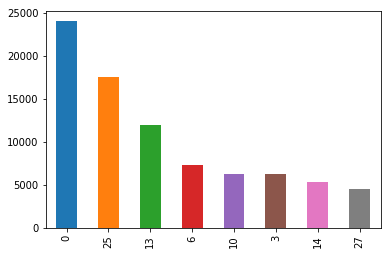

In [11]:
total_benefitted_data['total'].plot(kind='bar')
plt.savefig('State-vs-Persons-benefitted_withoutUsingSEABORN.png')

In [12]:
import seaborn as sns

In [13]:
sns.set()

In [14]:
total_benefitted_data=total_benefitted_data.set_index('STATE/UT')

In [15]:
total_benefitted_data

,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,total
STATE/UT,,,,,
Andhra Pradesh,9480,13758,672,170,24080
Uttar Pradesh,7876,8093,1353,212,17534
Madhya Pradesh,1978,9574,301,151,12004
Gujarat,2310,3133,875,966,7284
Jharkhand,3008,2595,138,574,6315
Bihar,1693,3013,125,1417,6248
Maharashtra,346,2743,882,1330,5301
West Bengal,2023,1889,123,460,4495


In [16]:
font={
    'size':20
}

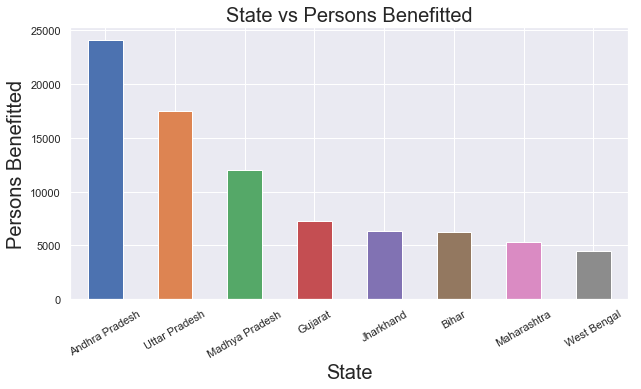

In [17]:
plt.figure(figsize=(10,5))
total_benefitted_data['total'].plot(kind='bar')
plt.xticks(rotation=30)
plt.xlabel('State',fontdict=font)
plt.ylabel('Persons Benefitted',fontdict=font)
plt.title('State vs Persons Benefitted',fontdict=font)
plt.savefig('State-vs-Persons-benefitted.png')

### Step 6: Create a pie chart to show ratio among different modes of benefits

In [18]:
data.columns

Index(['STATE/UT', 'No. of Inmates benefitted by Elementary Education',
       'No. of Inmates benefitted by Adult Education',
       'No. of Inmates benefitted by Higher Education',
       'No. of Inmates benefitted by Computer Course', 'total'],
      dtype='object')

In [19]:
elementary_education=data['No. of Inmates benefitted by Elementary Education'].sum(axis=0)
adult_education=data['No. of Inmates benefitted by Adult Education'].sum(axis=0)
higher_education=data['No. of Inmates benefitted by Higher Education'].sum(axis=0)
computer_course=data['No. of Inmates benefitted by Computer Course'].sum(axis=0)

In [20]:
data_dict={
    'Elementary':elementary_education,
    'Adult':adult_education,
    'Higher':higher_education,
    'Computer':computer_course
}

In [21]:
data_dict=pd.Series(data_dict)

In [22]:
data_dict

Elementary    37027
Adult         53720
Higher         8311
Computer       7356
dtype: int64

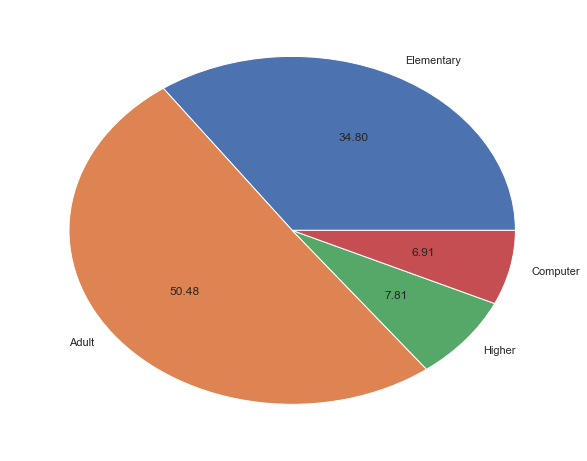

In [23]:
plt.figure(figsize=(10,8))
plt.pie(data_dict.values,labels=data_dict.index,autopct="%.2f")
plt.savefig('ratio_among_different_mode_of_benefit.png')

### Step 7: For the 5 highest benefitted states, create 
1. Bar chart. 
2. Stacked bar chart 
3. 100% stacked chart

In [24]:
total_benefitted_data=total_benefitted_data[:5]

In [25]:
total_benefitted_data.columns

Index(['No. of Inmates benefitted by Elementary Education',
       'No. of Inmates benefitted by Adult Education',
       'No. of Inmates benefitted by Higher Education',
       'No. of Inmates benefitted by Computer Course', 'total'],
      dtype='object')

In [26]:
total_benefitted_data.rename({
    'No. of Inmates benefitted by Elementary Education':'Elementary',
    'No. of Inmates benefitted by Adult Education':'Adult',
    'No. of Inmates benefitted by Higher Education':'Higher',
    'No. of Inmates benefitted by Computer Course':'Computer'
},axis=1,inplace=True)

C:\Users\Priyanka\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [34]:
total_benefitted_data.columns

Index(['Elementary', 'Adult', 'Higher', 'Computer', 'total'], dtype='object')

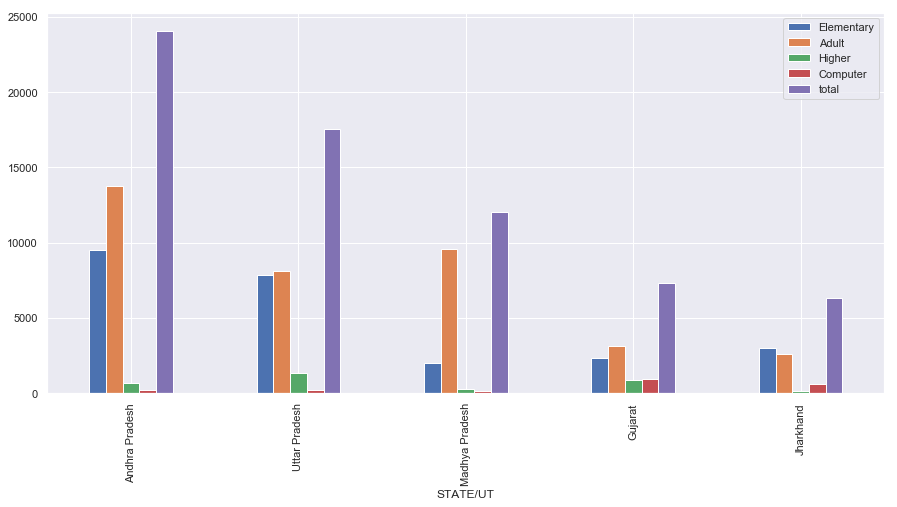

In [35]:
sns.set(rc={'figure.figsize':(15, 7)})
total_benefitted_data.plot(kind='bar')
plt.savefig('5_highest_benefitted_bar_chart.png')

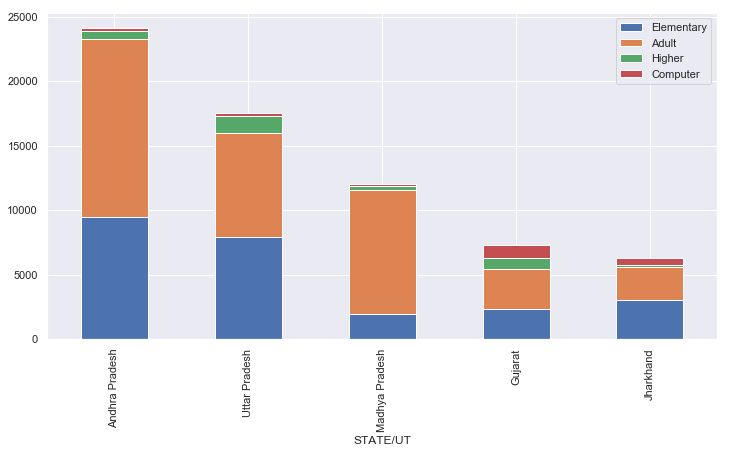

In [36]:
sns.set(rc={'figure.figsize':(12,6)})
total_benefitted_data[['Elementary', 'Adult', 'Higher', 'Computer']].plot(kind='bar',stacked=True)
plt.savefig('5_highest_benefitted_stacked_bar_chart.png')

In [37]:
new_data = total_benefitted_data.apply(lambda x: round(100 * x/total_benefitted_data['total']))

In [38]:
new_data.head()

,Elementary,Adult,Higher,Computer,total
STATE/UT,,,,,
Andhra Pradesh,39.0,57.0,3.0,1.0,100.0
Uttar Pradesh,45.0,46.0,8.0,1.0,100.0
Madhya Pradesh,16.0,80.0,3.0,1.0,100.0
Gujarat,32.0,43.0,12.0,13.0,100.0
Jharkhand,48.0,41.0,2.0,9.0,100.0


In [39]:
new_data.drop('total',axis=1,inplace=True)

In [40]:
new_data.head()

,Elementary,Adult,Higher,Computer
STATE/UT,,,,
Andhra Pradesh,39.0,57.0,3.0,1.0
Uttar Pradesh,45.0,46.0,8.0,1.0
Madhya Pradesh,16.0,80.0,3.0,1.0
Gujarat,32.0,43.0,12.0,13.0
Jharkhand,48.0,41.0,2.0,9.0


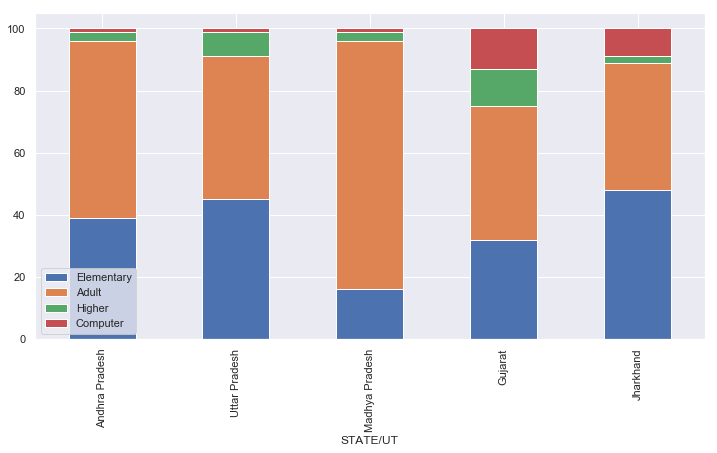

In [41]:
sns.set(rc={'figure.figsize':(12,6)})
new_data.plot(kind='bar',stacked=True)
plt.savefig('State-vs-Persons-benefitted.png')